## ECC plot

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [238]:
# Open results.txt (Place where I store experiment results of the ECC :) 
f = open("./results.txt")
lines = f.readlines()

In [240]:
i = 0
lloss = 0
data={"centered":{}, "not_centered":{}}

for line in lines[1:]: 
    i+=1
    a = line.split('\t')
    if ("(" in a[1]):
        a_ = a[1].replace("(", "").replace(")", "").replace(",", "")
        loss = float(a_)
    else: 
        loss = float(a[1])
    time = a[2]
    transport = False if "!" in a[3] else True
    success = True if "Tru" in a[4] else False
    if transport:     
        if lloss == loss:
            print("not same c")
            data["centered"]["{}".format(loss)]["duration"].append(int(time))
            data["centered"]["{}".format(loss)]["success"].append(success)
        else: 
            data["centered"]["{}".format(loss)] = {"duration": [time], "success": [success]}
        lloss = loss
    else: 
        if lloss == loss:
            print("not same nc")
            data["not_centered"]["{}".format(loss)]["duration"].append(int(time))
            data["not_centered"]["{}".format(loss)]["success"].append(success)
        else: 
            data["not_centered"]["{}".format(loss)]= {"duration": [time], "success": [success]}
        lloss = loss
        
    

not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not 

IndexError: list index out of range

In [151]:
losses = []
for items in data["centered"]: 
    losses.append(items)


In [256]:
print(data)

def analyze_vars(data, type_):
    losses = []
    for items in data["{}".format(type_)]: 
        losses.append(items)
    
    data_ = {}
    for loss in losses:
        data_["{}".format(loss)]={"avg":0, "succ_per":0}
        duration_ = data["{}".format(type_)][str(loss)]["duration"]
        success = data["{}".format(type_)][str(loss)]["success"]
        success_i = [i for i, s in enumerate(success) if s]
        duration_s = [int(duration_[i]) for i in success_i]
        if len(duration_s) > 0:
            data_["{}".format(loss)]["avg"] = float(sum(duration_s))/len(duration_s)
            data_["{}".format(loss)]["max"] = max(duration_s)
            data_["{}".format(loss)]["min"] = min(duration_s)
            data_["{}".format(loss)]["succ_per"] = len(success_i)/10
        else: 
            data_["{}".format(loss)]["avg"] = 0
            data_['{}'.format(loss)]["max"] = 0
            data_["{}".format(loss)]["min"] = 0
            data_["{}".format(loss)]["succ_per"] = 0

    
    return losses, data_



    

{'centered': {'0.1': {'duration': [' 16', 22, 18, 17, 36, 19, 16, 17, 46, 19], 'success': [True, True, True, True, True, True, True, True, True, True]}, '0.5': {'duration': [' 17', 16, 15, 22, 17, 19, 18, 25, 17, 16], 'success': [True, True, True, True, True, True, True, True, True, True]}, '0.75': {'duration': [' 34', 19, 23, 22, 21, 21, 17, 17, 21, 22], 'success': [True, True, True, True, True, True, True, True, True, True]}, '0.8': {'duration': [' 18', 18, 30, 17, 17, 29, 30, 19, 61, 24], 'success': [True, True, True, True, True, True, True, True, False, True]}, '0.85': {'duration': [' 22', 61, 18, 25, 18, 17, 24, 30, 18, 26], 'success': [True, False, True, True, True, True, True, True, True, True]}, '0.9': {'duration': [' 16', 32, 17, 61, 18, 39, 61, 23, 25, 22], 'success': [True, True, True, False, True, True, False, True, True, True]}, '0.95': {'duration': [' 61', 61, 61, 61, 61, 27, 61, 61, 37, 61], 'success': [False, False, False, False, False, True, False, False, True, False]}

In [257]:
try:
   losses, c_data = analyze_vars(data, "centered")
except Exception as e:
    print(str(e))
try:
    losses, nc_data = analyze_vars(data, "not_centered")
except Exception as e:
    print(str(e))

In [258]:
print(c_data)
print(nc_data)

{'0.1': {'avg': 22.6, 'succ_per': 1.0, 'max': 46, 'min': 16}, '0.5': {'avg': 18.2, 'succ_per': 1.0, 'max': 25, 'min': 15}, '0.75': {'avg': 21.7, 'succ_per': 1.0, 'max': 34, 'min': 17}, '0.8': {'avg': 22.444444444444443, 'succ_per': 0.9, 'max': 30, 'min': 17}, '0.85': {'avg': 22.0, 'succ_per': 0.9, 'max': 30, 'min': 17}, '0.9': {'avg': 24.0, 'succ_per': 0.8, 'max': 39, 'min': 16}, '0.95': {'avg': 32.0, 'succ_per': 0.2, 'max': 37, 'min': 27}, '0.99': {'avg': 0, 'succ_per': 0, 'max': 0, 'min': 0}}
{'0.1': {'avg': 37.77777777777778, 'succ_per': 0.9, 'max': 67, 'min': 23}, '0.5': {'avg': 32.7, 'succ_per': 1.0, 'max': 54, 'min': 24}, '0.75': {'avg': 31.0, 'succ_per': 0.9, 'max': 41, 'min': 23}, '0.8': {'avg': 27.88888888888889, 'succ_per': 0.9, 'max': 33, 'min': 24}, '0.85': {'avg': 29.77777777777778, 'succ_per': 0.9, 'max': 36, 'min': 25}, '0.9': {'avg': 39.333333333333336, 'succ_per': 0.3, 'max': 44, 'min': 35}, '0.95': {'avg': 39.0, 'succ_per': 0.2, 'max': 43, 'min': 35}, '0.99': {'avg': 

In [259]:
c_avg = []
c_min = []
c_max = []
c_suc = []
for i in c_data:
    c_avg.append(c_data[i]['avg'])
    c_max.append(c_data[i]['max'])
    c_min.append(c_data[i]['min'])
    c_suc.append(c_data[i]['succ_per'])

In [260]:
nc_avg = []
nc_min = []
nc_max = []
nc_suc = []
for i in nc_data:
    nc_avg.append(nc_data[i]['avg'])
    nc_max.append(nc_data[i]['max'])
    nc_min.append(nc_data[i]['min'])
    nc_suc.append(nc_data[i]['succ_per'])

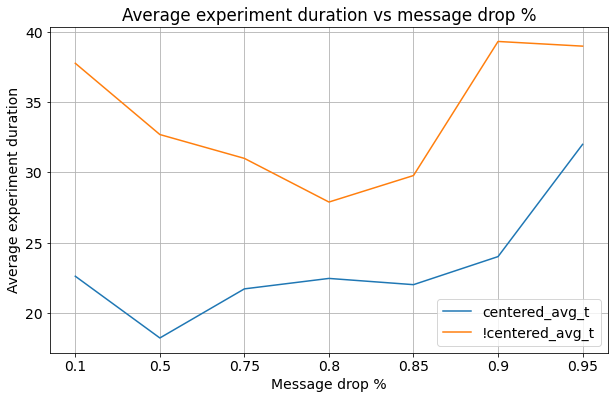

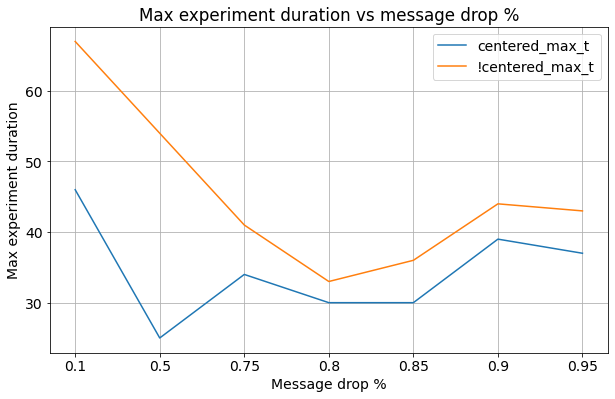

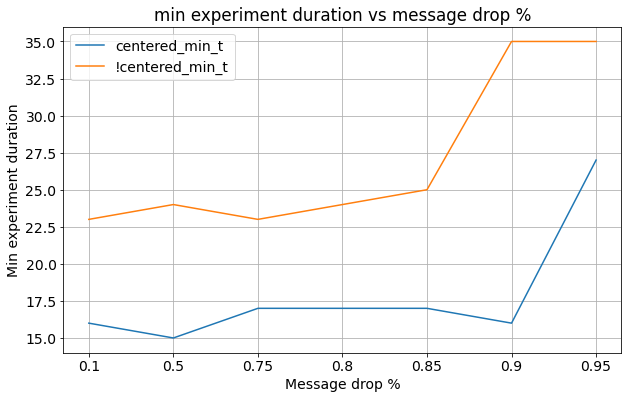

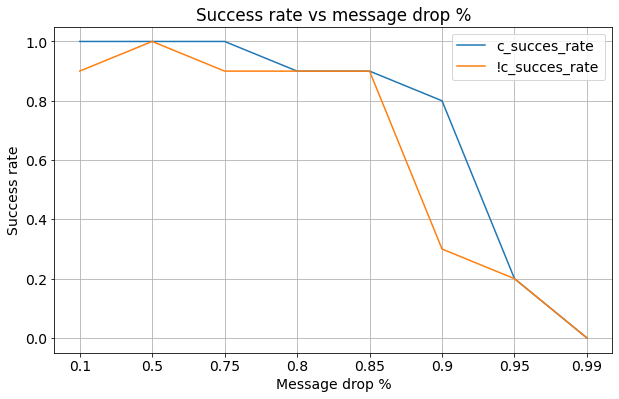

In [270]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 14})
# https://matplotlib.org/stable/gallery/ticks/tick_labels_from_values.html
plt.figure(figsize=(10, 6))
plt.plot(losses[:-1], c_avg[:-1], label="centered_avg_t")
plt.plot(losses[:-1], nc_avg[:-1], label="!centered_avg_t")
plt.grid()
plt.legend()
plt.xlabel('Message drop %')
plt.ylabel('Average experiment duration')
plt.title('Average experiment duration vs message drop %')
plt.savefig('message_drop_vs_avg_duration.png')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(losses[:-1], c_max[:-1], label="centered_max_t")
plt.plot(losses[:-1], nc_max[:-1], label="!centered_max_t")
plt.grid()
plt.legend()
plt.xlabel('Message drop %')
plt.ylabel('Max experiment duration')
plt.title('Max experiment duration vs message drop %')
plt.savefig('message_drop_vs_max_duration.png')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(losses[:-1], c_min[:-1], label="centered_min_t")
plt.plot(losses[:-1], nc_min[:-1], label="!centered_min_t")
plt.grid()
plt.legend()
plt.xlabel('Message drop %')
plt.ylabel('Min experiment duration')
plt.title('min experiment duration vs message drop %')
plt.savefig('message_drop_vs_min_duration.png')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(losses, c_suc, label="c_succes_rate")
plt.plot(losses, nc_suc,label="!c_succes_rate")
plt.legend()
plt.xlabel('Message drop %')
plt.ylabel('Success rate')
plt.title('Success rate vs message drop %')
plt.grid()
plt.savefig('message_drop_vs_success_rate.png')
plt.show()


In [219]:
print(losses)

None


In [210]:
losses = list(set([float(l) for l in losses]))
losses.sort

TypeError: 'NoneType' object is not iterable

In [204]:
c_suc

[1.0, 1.0, 1.0, 0.9, 0.9, 0.8, 0.2, 0]

In [205]:
losses


[0.1, 0.5, 0.85, 0.8, 0.75, 0.9, 0.95, 0.99]

In [206]:
nc_suc

[0.9, 1.0, 0.9, 0.9, 0.9, 0.3, 0.2, 0]